In [1]:
# binance data
from binance.client import Client

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline  

from datetime import datetime, timedelta, timezone

from price_data import *
from strategy import *

In [2]:
client = Client()
symbols = ['BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'BNBUSDT']

historical_data_fetcher = { symbol : HistDataFetcher(client, symbol) for symbol in symbols }
#historical_data_fetcher = { symbol : RecentDataFetcher(client, symbol) for symbol in symbols }

In [3]:
# init strategies
sma_backtester = SMA(symbols, historical_data_fetcher, params = {'sma':15})
sma_cross_backtester = SMACrossover(symbols, historical_data_fetcher, params = {'slow_sma':8, 'fast_sma':5})

In [4]:
start_datetime = datetime(2018,1,1).replace(tzinfo = timezone.utc) # utc time IMPORTANT
end_datetime = datetime(2021,3,20).replace(tzinfo = timezone.utc)#start_datetime+timedelta(weeks=145)

interval = '1d'

# create backtests
bt1 = sma_backtester.get_backtest(interval, start_datetime, end_datetime, Strategy.FIX_WEIGHTS)
bt2 = sma_backtester.get_backtest(interval, start_datetime, end_datetime, Strategy.FULLY_ALLOCATE)

bt3 = sma_cross_backtester.get_backtest(interval, start_datetime, end_datetime, Strategy.FIX_WEIGHTS)


# benchmark backtest is even weighted portfolio of all assets
benchmark = BacktestUtils.get_benchmark_bt()

sma_15_crossover 1d fixed
0% [############################# ] 100% | ETA: 00:00:00sma_15_crossover 1d full
0% [############################# ] 100% | ETA: 00:00:00sma_crossover_8_5 1d fixed
0% [############################# ] 100% | ETA: 00:00:00benchmark
0% [############################# ] 100% | ETA: 00:00:00

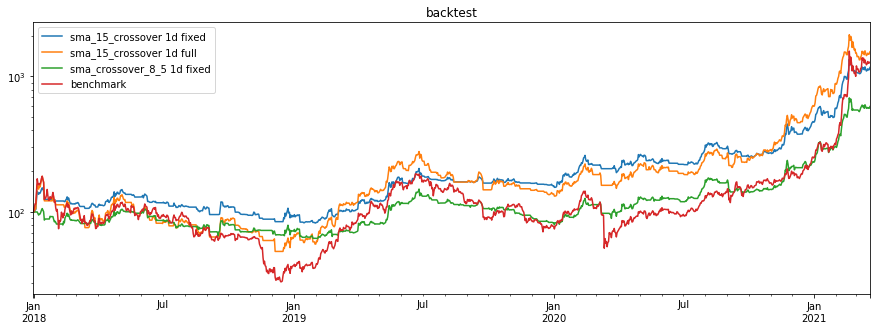

Stat                 sma_15_crossover 1d fixed    sma_15_crossover 1d full    sma_crossover_8_5 1d fixed    benchmark
-------------------  ---------------------------  --------------------------  ----------------------------  -----------
Start                2017-12-31                   2017-12-31                  2017-12-31                    2017-12-31
End                  2021-03-20                   2021-03-20                  2021-03-20                    2021-03-20
Risk-free rate       0.00%                        0.00%                       0.00%                         0.00%

Total Return         1064.16%                     1419.23%                    499.17%                       1173.86%
Daily Sharpe         1.39                         1.23                        1.09                          1.08
Daily Sortino        2.50                         2.07                        1.82                          1.85
CAGR                 114.47%                      132.97%         

In [5]:
res = BacktestUtils.run_backtest([bt1,bt2,bt3, benchmark], sma_cross_backtester.close_prices)
BacktestUtils.plot_backtest(res)
BacktestUtils.display_stats(res)